# Homework 1:  
Data Cleaning, Describing, and Visualization

## Description:
In this data science project, I will read in three different kinds of data sets (CSV, SQL, JSON). 

After I have read in these three data sets, I will:
1. Clean the data (handle missing data, handle outliers, scale the data, convert some data to categorical, etc.)
2. Describe the data with tables, statistics, and summaries. 
3. Visualize the data. 

### Import Libraries

In [109]:
#import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy as sp
import sqlite3
import json
from scipy import stats
from urllib.request import Request, urlopen
from pandas.io.json import json_normalize

#%matplotlib inline shows plots in Jupyter Notebook browser
%matplotlib inline

### Import Dataset 1

When I was a kid, I was obsessed with Pokemon. I used to bring my binder filled with Pokemon cards to school every day to trade with my friends. Although I collected Pokemon cards, played all the Pokemon gameboy games, and watched the Pokemon television show, there's still a lot about Pokemon that I don't know. My goal is to answer a few lifelong questions by analyzing Pokemon data.

In [2]:
#reading in the Pokemon data set downloaded from kaggle
pokemon_data = pd.read_csv(r"C:\Users\Spencer\Dropbox\School\Fall 2018\Machine Learning\Projects\Homework_1\Pokemon.csv", encoding="latin1")

### Summarize Data

Now that the data has been read into Python, we will want to preview the data set

In [3]:
#preview data
pokemon_data.info()
pokemon_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
#             800 non-null int64
Name          800 non-null object
Type 1        800 non-null object
Type 2        414 non-null object
Total         800 non-null int64
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


From the data preview, I can see: 13 variables, 800 observations, which features are missing data, and how variables are encoded.

In [4]:
#describe data
pokemon_data.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


From describing the data, I learn the basic information of min and max values, mean, and standard deviation. 

### Cleaning Data

Now I will print all of the columns so I can see exactly what information is included in the dataset.

In [5]:
#Printing all of the columns
print(pokemon_data.columns)

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')


I am going to drop the "#" column becasue it isn't needed in the analysis of this dataset.

In [6]:
#Dropping the "#" column
pokemon_data.drop(['#'], inplace=True, axis=1)

Now I am going to rename a couple of the columns with unnecessary spaces in their names to make them easier to deal with later.

In [7]:
#Renaming some of the columns
pokemon_data.rename(columns={'Type 1': 'Type_1', 'Type 2': "Type_2"}, inplace=True)

### Visualizing Data

Now that the data is clean, I will look for correlation between the variables.

In [8]:
#Look for correlation in the data
pokemon_data.corr()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Total,1.000000,0.618748,0.736211,0.612787,0.747250,0.717609,0.575943,0.048384,0.501758
HP,0.618748,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952,0.058683,0.273620
Attack,0.736211,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240,0.051451,0.345408
Defense,0.612787,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227,0.042419,0.246377
Sp. Atk,0.747250,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018,0.036437,0.448907
Sp. Def,0.717609,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133,0.028486,0.363937
Speed,0.575943,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000,-0.023121,0.326715
Generation,0.048384,0.058683,0.051451,0.042419,0.036437,0.028486,-0.023121,1.000000,0.079794
Legendary,0.501758,0.273620,0.345408,0.246377,0.448907,0.363937,0.326715,0.079794,1.000000


We can quickly see that a good amount of the data is correlated. One thing to notice is that "generation" does not have a high correlation with any of the other variables which means that pokemon didn't get meaningfully stronger or weaker as generations progressed. 

Now I am going to use a barplot to compare two categories: Type 1 of pokemon, and total stats (Sum of Attack, Sp. Atk, Defense, Sp. Def, Speed and HP) to see which type of pokemon is the strongest. 

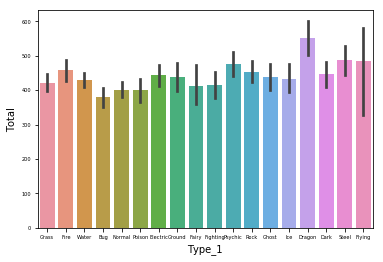

In [9]:
#Show barplot to compare two categories
sns.barplot(pokemon_data.Type_1, pokemon_data.Total).tick_params(labelsize=5)

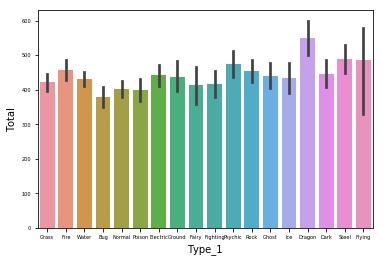

In [117]:
def barplot(x_axis, y_axis, tick_size):
    sns.barplot(x_axis, y_axis).tick_params(labelsize=tick_size)
barplot(pokemon_data.Type_1, pokemon_data.Total, 5)

From the barplot, we can see that the strongest type of pokemon based on total stats is the Dragon type. The weakest pokemon type is Bug type.

My next question is around legendary pokemon. Are legendary pokemon stronger than non-legendary pokemon? My gut says yes, but we can find out with a barplot that shows legendary pokemon's total stats vs. non-legendary pokemon's total stats. 

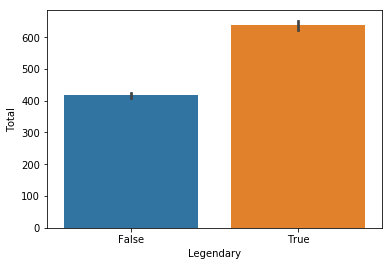

In [118]:
barplot(pokemon_data.Legendary, pokemon_data.Total, 10)

We can see from the above barplot that legendary pokemon are, indeed, stronger than non-legendary pokemon based on total stats.

C:\Users\Spencer\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0,0.5,'Number of Pokemon')

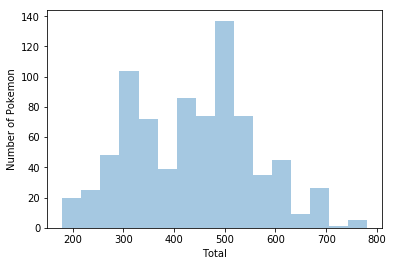

In [86]:
#Use Seaborn to create a histogram
sns.distplot(pokemon_data.Total, kde=False)
plt.ylabel('Number of Pokemon', fontsize=10)

Another way of visualizing this data is by using a histogram to plot the distribution. In the above graph, we see that total stats are bimodally distributed with two peaks around 300 and 500. 

### Import Dataset 2

In [152]:
#reading in the LendingClub dataset downloaded from kaggle
conn  =  sqlite3.connect("C:/Users/Spencer/Dropbox/School/Fall 2018/Machine Learning/Projects/Homework_1/database.sqlite")

In [153]:
#preview data
head_df = pd.read_sql_query("select * from loan limit 10;", conn)
head_df

,index,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599.0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,...,None,None,None,None,None,None,None,None,None,None
1,1,1077430,1314167.0,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,...,None,None,None,None,None,None,None,None,None,None
2,2,1077175,1313524.0,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,...,None,None,None,None,None,None,None,None,None,None
3,3,1076863,1277178.0,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,...,None,None,None,None,None,None,None,None,None,None
4,4,1075358,1311748.0,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,...,None,None,None,None,None,None,None,None,None,None
5,5,1075269,1311441.0,5000.0,5000.0,5000.0,36 months,7.90%,156.46,A,...,None,None,None,None,None,None,None,None,None,None
6,6,1069639,1304742.0,7000.0,7000.0,7000.0,60 months,15.96%,170.08,C,...,None,None,None,None,None,None,None,None,None,None
7,7,1072053,1288686.0,3000.0,3000.0,3000.0,36 months,18.64%,109.43,E,...,None,None,None,None,None,None,None,None,None,None
8,8,1071795,1306957.0,5600.0,5600.0,5600.0,60 months,21.28%,152.39,F,...,None,None,None,None,None,None,None,None,None,None
9,9,1071570,1306721.0,5375.0,5375.0,5350.0,60 months,12.69%,121.45,B,...,None,None,None,None,None,None,None,None,None,None


This is a fairly large dataset with 75 variables and 887383	observations. To make it a little more manageable, I am only going to select 10 of the variables to include in our dataset.

In [154]:
#Selecting only 10 of the most interesting variables and cutting down observations to 1000
df_lite = pd.read_sql_query("""select loan_amnt, term, int_rate, funded_amnt, zip_code, addr_state, emp_title, emp_length, home_ownership, grade from loan
                    """, conn)
df_lite


,loan_amnt,term,int_rate,funded_amnt,zip_code,addr_state,emp_title,emp_length,home_ownership,grade
0,5000.0,36 months,10.65%,5000.0,860xx,AZ,None,10+ years,RENT,B
1,2500.0,60 months,15.27%,2500.0,309xx,GA,Ryder,< 1 year,RENT,C
2,2400.0,36 months,15.96%,2400.0,606xx,IL,None,10+ years,RENT,C
3,10000.0,36 months,13.49%,10000.0,917xx,CA,AIR RESOURCES BOARD,10+ years,RENT,C
4,3000.0,60 months,12.69%,3000.0,972xx,OR,University Medical Group,1 year,RENT,B
5,5000.0,36 months,7.90%,5000.0,852xx,AZ,Veolia Transportaton,3 years,RENT,A
6,7000.0,60 months,15.96%,7000.0,280xx,NC,Southern Star Photography,8 years,RENT,C
7,3000.0,36 months,18.64%,3000.0,900xx,CA,MKC Accounting,9 years,RENT,E
8,5600.0,60 months,21.28%,5600.0,958xx,CA,None,4 years,OWN,F
9,5375.0,60 months,12.69%,5375.0,774xx,TX,Starbucks,< 1 year,RENT,B


In [155]:
df_lite.info()
df_lite.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887383 entries, 0 to 887382
Data columns (total 10 columns):
loan_amnt         887382 non-null float64
term              887382 non-null object
int_rate          887382 non-null object
funded_amnt       887382 non-null float64
zip_code          887382 non-null object
addr_state        887382 non-null object
emp_title         835925 non-null object
emp_length        887382 non-null object
home_ownership    887382 non-null object
grade             887382 non-null object
dtypes: float64(2), object(8)
memory usage: 67.7+ MB


,loan_amnt,funded_amnt
count,887382.000000,887382.000000
mean,14755.280082,14741.893147
std,8435.456408,8429.898507
min,500.000000,500.000000
25%,8000.000000,8000.000000
50%,13000.000000,13000.000000
75%,20000.000000,20000.000000
max,35000.000000,35000.000000


In [156]:
pd.read_sql_query("""select *, max(int_rate) from loan""", conn)

,index,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,max(int_rate)
0,2807,68394899,73284687.0,30225.0,30225.0,30225.0,60 months,28.99%,959.22,G,...,77.5,3.0,3.0,4604.0,67.1,26900.0,0.0,0.0,4.0,28.99%


In [162]:
df_lite.corr()

,loan_amnt,funded_amnt
loan_amnt,1.000000,0.999263
funded_amnt,0.999263,1.000000


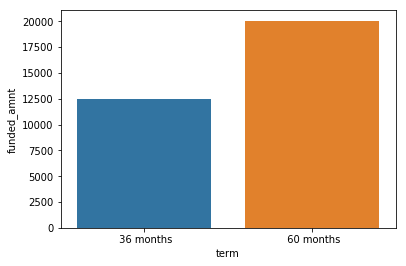

In [169]:
barplot(df_lite.term,df_lite.funded_amnt, 10)

ValueError: cannot convert float NaN to integer

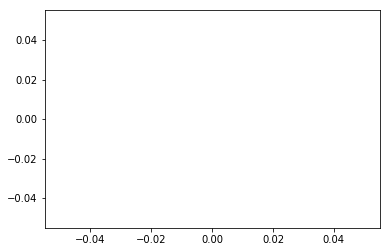

In [171]:
sns.distplot(df_lite.loan_amnt)

### Import Dataset 3

This past summer, I interned at Citigroup in San Francisco in their technology investment banking group. I spent the majority of my time researching and analyzing and advising tech companies on mergers and acquisitions and raising money in the capital markets. For my last dataset, I decided to leverage the IEX API to analyze some tech company financial data. I then leveraged some code written by github user "himoacs" to retrieve the financial data from IEX. 

In [110]:
#Creating the class 'API'

class API(object):

    def __init__(self):
        self._end_point_prefix = r'https://api.iextrading.com/1.0/'

    def return_valid_securities(self, securities):
        suffix = r'ref-data/symbols'
        valid_securities = self._url_to_dataframe(self._end_point_prefix+suffix)['symbol']
        return [x for x in securities if x in set(valid_securities)]

    def _url_to_dataframe(self, url, nest=None):
        request = Request(url)
        response = urlopen(request)
        elevations = response.read()
        data = json.loads(elevations)

        if nest:
            data = json_normalize(data[nest])
        else:
            data = json_normalize(data)

        return pd.DataFrame(data)

    def get_financials(self, securities):
        securities = self.return_valid_securities(securities)
        final_df = pd.DataFrame({})

        # Get financials of each company and then append the results together
        if securities:
            for symbol in securities:
                suffix = r'stock/{symbol}/financials'.format(symbol=symbol)
                df = self._url_to_dataframe(self._end_point_prefix + suffix, 'financials')
                df['symbol'] = symbol
                final_df = final_df.append(df, ignore_index=True)
            return final_df
        else:
            print('These stock(s) are invalid!')

In [129]:
m  =  API()
ticker_list  = ['AAPL', 'GOOGL', 'FB', 'AMZN', 'MSFT', 'INTC', 'IBM', 'HPE', 'CSCO', 'ORCL']
fin_df = pd.DataFrame(m.get_financials(ticker_list))

C:\Users\Spencer\Anaconda3\lib\site-packages\pandas\core\frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


In [130]:
fin_df[fin_df['symbol']=='AAPL']

,cashChange,cashFlow,costOfRevenue,currentAssets,currentCash,currentDebt,grossProfit,netIncome,operatingExpense,operatingGainsLosses,operatingIncome,operatingRevenue,reportDate,researchAndDevelopment,shareholderEquity,symbol,totalAssets,totalCash,totalDebt,totalRevenue
0,-13088000000,14488000000,32844000000,115761000000,31971000000,1.747200e+10,20421000000,11519000000,7809000000,NaN,12612000000,53265000000,2018-06-30,3701000000,114949000000,AAPL,349197000000,70970000000,1.146000e+11,53265000000
1,17568000000,15130000000,37715000000,130053000000,45059000000,2.047800e+10,23422000000,13822000000,7528000000,NaN,15894000000,61137000000,2018-03-31,3378000000,126878000000,AAPL,367502000000,87940000000,1.218400e+11,61137000000
2,7202000000,28293000000,54381000000,143810000000,27491000000,1.847800e+10,33912000000,20065000000,7638000000,NaN,26274000000,88293000000,2017-12-31,3407000000,140199000000,AAPL,406794000000,77153000000,1.224000e+11,88293000000
3,1718000000,15122000000,32648000000,128645000000,20289000000,1.847300e+10,19931000000,10714000000,6811000000,NaN,13120000000,52579000000,2017-09-30,2997000000,134047000000,AAPL,375319000000,74181000000,1.156800e+11,52579000000


## Summarize the data

In [131]:
#preview the data
fin_df.info()
fin_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 20 columns):
cashChange                40 non-null int64
cashFlow                  40 non-null int64
costOfRevenue             40 non-null int64
currentAssets             40 non-null int64
currentCash               40 non-null int64
currentDebt               29 non-null float64
grossProfit               40 non-null int64
netIncome                 40 non-null int64
operatingExpense          40 non-null int64
operatingGainsLosses      28 non-null float64
operatingIncome           40 non-null int64
operatingRevenue          40 non-null int64
reportDate                40 non-null object
researchAndDevelopment    40 non-null int64
shareholderEquity         40 non-null int64
symbol                    40 non-null object
totalAssets               40 non-null int64
totalCash                 40 non-null int64
totalDebt                 29 non-null float64
totalRevenue              40 non-null int64
dtypes: f

,cashChange,cashFlow,costOfRevenue,currentAssets,currentCash,currentDebt,grossProfit,netIncome,operatingExpense,operatingGainsLosses,operatingIncome,operatingRevenue,reportDate,researchAndDevelopment,shareholderEquity,symbol,totalAssets,totalCash,totalDebt,totalRevenue
0,-13088000000,14488000000,32844000000,115761000000,31971000000,1.747200e+10,20421000000,11519000000,7809000000,NaN,12612000000,53265000000,2018-06-30,3701000000,114949000000,AAPL,349197000000,70970000000,1.146000e+11,53265000000
1,17568000000,15130000000,37715000000,130053000000,45059000000,2.047800e+10,23422000000,13822000000,7528000000,NaN,15894000000,61137000000,2018-03-31,3378000000,126878000000,AAPL,367502000000,87940000000,1.218400e+11,61137000000
2,7202000000,28293000000,54381000000,143810000000,27491000000,1.847800e+10,33912000000,20065000000,7638000000,NaN,26274000000,88293000000,2017-12-31,3407000000,140199000000,AAPL,406794000000,77153000000,1.224000e+11,88293000000
3,1718000000,15122000000,32648000000,128645000000,20289000000,1.847300e+10,19931000000,10714000000,6811000000,NaN,13120000000,52579000000,2017-09-30,2997000000,134047000000,AAPL,375319000000,74181000000,1.156800e+11,52579000000
4,1821000000,10132000000,13883000000,124157000000,14148000000,NaN,18774000000,3195000000,10896000000,-1.068000e+09,7878000000,32512000000,2018-06-30,5114000000,162000000000,GOOGL,211610000000,102254000000,NaN,32657000000


In [132]:
fin_df.describe()

,cashChange,cashFlow,costOfRevenue,currentAssets,currentCash,currentDebt,grossProfit,netIncome,operatingExpense,operatingGainsLosses,operatingIncome,operatingRevenue,researchAndDevelopment,shareholderEquity,totalAssets,totalCash,totalDebt,totalRevenue
count,4.000000e+01,4.000000e+01,4.000000e+01,4.000000e+01,4.000000e+01,2.900000e+01,4.000000e+01,4.000000e+01,4.000000e+01,2.800000e+01,4.000000e+01,4.000000e+01,4.000000e+01,4.000000e+01,4.000000e+01,4.000000e+01,2.900000e+01,4.000000e+01
mean,2.350000e+08,7.081800e+09,1.329078e+10,7.654405e+10,1.359572e+10,7.356517e+09,1.203142e+10,3.514225e+09,6.398200e+09,-1.079643e+08,5.633225e+09,2.507612e+10,2.865425e+09,6.858855e+10,1.607514e+11,5.479758e+10,5.289131e+10,2.532215e+10
std,4.990818e+09,5.567167e+09,1.412462e+10,4.571631e+10,8.234749e+09,5.695104e+09,6.461351e+09,5.187129e+09,2.777419e+09,1.789062e+09,4.938048e+09,1.888362e+10,1.777060e+09,4.409936e+10,8.958262e+10,4.113318e+10,3.470866e+10,1.890827e+10
min,-1.308800e+10,-1.791000e+09,1.448000e+09,1.746700e+10,2.614000e+09,1.329000e+09,2.183000e+09,-8.778000e+09,1.735000e+09,-2.992000e+09,-4.280000e+08,7.468000e+09,3.640000e+08,1.759400e+10,5.751300e+10,5.193000e+09,5.302000e+09,7.468000e+09
25%,-1.821250e+09,3.505000e+09,4.707750e+09,4.628175e+10,8.720250e+09,3.842000e+09,7.883750e+09,1.271500e+09,4.478750e+09,-4.210000e+08,2.964250e+09,1.186400e+10,1.532500e+09,3.052450e+10,1.149522e+11,1.564825e+10,2.807200e+10,1.194625e+10
50%,3.000000e+06,6.291000e+09,7.410500e+09,6.101700e+10,1.180700e+10,4.491000e+09,1.023800e+10,2.708500e+09,5.471000e+09,-6.700000e+07,4.559500e+09,1.806200e+10,2.760000e+09,6.728450e+10,1.284770e+11,4.525200e+10,4.562600e+10,1.806200e+10
75%,1.920250e+09,1.016600e+10,1.357100e+10,1.204490e+11,1.783175e+10,9.220000e+09,1.685550e+10,5.031000e+09,8.925250e+09,1.575000e+07,7.675000e+09,3.031275e+10,3.704500e+09,8.021600e+10,1.997050e+11,7.492400e+10,7.624000e+10,3.144025e+10
max,1.756800e+10,2.829300e+10,5.438100e+10,1.696620e+11,4.505900e+10,2.047800e+10,3.391200e+10,2.006500e+10,1.133900e+10,8.135000e+09,2.627400e+10,8.829300e+10,7.247000e+09,1.620000e+11,4.067940e+11,1.427800e+11,1.224000e+11,8.829300e+10


### Cleaning the Data

Upon closer examination, the 'reportDate' variable appears to be a non-null object. First step is to convert it to a non-null datetime64 object.

In [133]:
fin_df['reportDate'] = pd.to_datetime(fin_df['reportDate'])

Next I will exame the dataset for missing values.

In [134]:
fin_df.isnull().any()

cashChange                False
cashFlow                  False
costOfRevenue             False
currentAssets             False
currentCash               False
currentDebt                True
grossProfit               False
netIncome                 False
operatingExpense          False
operatingGainsLosses       True
operatingIncome           False
operatingRevenue          False
reportDate                False
researchAndDevelopment    False
shareholderEquity         False
symbol                    False
totalAssets               False
totalCash                 False
totalDebt                  True
totalRevenue              False
dtype: bool